Импортируем стандартные модули для анализа данных

In [1]:
import pandas as pd 
import numpy as np 

В отладке было много varning`ов, поэтому поставлю на все ignore

In [2]:
import warnings
warnings.filterwarnings('ignore')

Задание 1

1. Предобработка таблицы:

In [3]:
import os
cur_dir = "."
work_files = [file for file in os.listdir(cur_dir)]
work_files

['.ipynb_checkpoints',
 'task2.xlsx',
 'Test_task_Gilmutdinov.ipynb',
 '~$стовое задание на аналитика.docx',
 'Города.xlsx',
 'Сотрудники.xlsx',
 'Тестовое задание на аналитика.docx']

In [4]:
employee_data = pd.read_excel('Сотрудники.xlsx')
employee_data.head()

,Период,ID должности,Табельный номер,Город,Должность,ФИО
0,44927,1000,2201.0,Новоуральск,главный клиентский менеджер розничного бизнеса,Корнеев З.
1,44927,1001,2202.0,Оленегорск,управляющий операционным офисом,Сергеев Е.
2,44927,1002,2203.0,Североуральск,руководитель группы,Корнеев Д.
3,44927,1003,2204.0,Жуковка,офис-менеджер,Петров Н.
4,44927,1004,2205.0,Воркута,эксперт по работе с партнерами,Корнеев Я.


In [5]:
employee_data.dtypes

Период               int64
ID должности        object
Табельный номер    float64
Город               object
Должность           object
ФИО                 object
dtype: object

In [6]:
employee_shape = employee_data.shape
employee_dtypes = employee_data.dtypes
employee_isna = employee_data.isna()
employee_isnull = employee_data.isnull()
print(f"employee_data размерность {employee_shape}")
print(f"employee_data типы данных {employee_dtypes}")
print(f"employee_data пропуски nan {employee_isna.any()}")
print(f"employee_data пропуски null {employee_isnull.any()}")

employee_data размерность (5001, 6)
employee_data типы данных Период               int64
ID должности        object
Табельный номер    float64
Город               object
Должность           object
ФИО                 object
dtype: object
employee_data пропуски nan Период             False
ID должности       False
Табельный номер     True
Город               True
Должность           True
ФИО                 True
dtype: bool
employee_data пропуски null Период             False
ID должности       False
Табельный номер     True
Город               True
Должность           True
ФИО                 True
dtype: bool


Очевидно, что в данных есть пропуски, устриним их в следующих шагах (теперь у нас есть маски по которым будем работать с пропусками). 

1.1. В таблице есть ошибки данных (некорректный для поля тип данных, дубликат и пр.), укажите, как их обнаружили, и что предприняли для их устранения

In [7]:
employee_dtypes

Период               int64
ID должности        object
Табельный номер    float64
Город               object
Должность           object
ФИО                 object
dtype: object

Приведем ID к int, у табельного номера странный тип, но оставим (вдруг у системы такие требования), город, долдность, фио типы. 
1) Проверим нет ли в id букв и спец символов, а вдругих очевидно строчных данных нет ли цифр?
2) удалим неверные символы
3) приведем данные к нужным типам

In [8]:
try:
    employee_data["ID должности"] = employee_data["ID должности"].astype(int)
except:
    print("есть примеси в данных")

есть примеси в данных


In [9]:
employee_data['ID должности'][13]

'1013,Нягань'

In [10]:
#сделаем в одну проходку без проверок (так дешевле) удаление нецифр из ID
employee_data["ID должности"] = employee_data["ID должности"].astype(str).str.extract('(\d+)').astype(int)

In [11]:
employee_data["Период"] = pd.to_datetime(employee_data["Период"], unit='D', origin='1899-12-30')
# или


In [12]:
employee_data.head()

,Период,ID должности,Табельный номер,Город,Должность,ФИО
0,2023-01-01,1000,2201.0,Новоуральск,главный клиентский менеджер розничного бизнеса,Корнеев З.
1,2023-01-01,1001,2202.0,Оленегорск,управляющий операционным офисом,Сергеев Е.
2,2023-01-01,1002,2203.0,Североуральск,руководитель группы,Корнеев Д.
3,2023-01-01,1003,2204.0,Жуковка,офис-менеджер,Петров Н.
4,2023-01-01,1004,2205.0,Воркута,эксперт по работе с партнерами,Корнеев Я.


In [13]:
employee_data['ID должности'][13]

1013

In [14]:
#переведем остальные фичи в строковой тип
employee_data['Город'] = employee_data['Город'].astype(str)
employee_data['Должность'] = employee_data['Должность'].astype(str)
employee_data['ФИО'] = employee_data['ФИО'].astype(str)

employee_data["Город"] = employee_data["Город"].str.replace(r"\d+", "", regex=True)
employee_data["Должность"] = employee_data["Должность"].str.replace(r"\d+", "", regex=True)
employee_data["ФИО"] = employee_data["ФИО"].str.replace(r"\d+", "", regex=True)

In [15]:
employee_data.dtypes

Период             datetime64[ns]
ID должности                int32
Табельный номер           float64
Город                      object
Должность                  object
ФИО                        object
dtype: object

In [16]:
employee_data.head()

,Период,ID должности,Табельный номер,Город,Должность,ФИО
0,2023-01-01,1000,2201.0,Новоуральск,главный клиентский менеджер розничного бизнеса,Корнеев З.
1,2023-01-01,1001,2202.0,Оленегорск,управляющий операционным офисом,Сергеев Е.
2,2023-01-01,1002,2203.0,Североуральск,руководитель группы,Корнеев Д.
3,2023-01-01,1003,2204.0,Жуковка,офис-менеджер,Петров Н.
4,2023-01-01,1004,2205.0,Воркута,эксперт по работе с партнерами,Корнеев Я.


1.2. Часть данных по некоторым должностям была утеряна, но известно, что ID имеет уникальную должность и локацию, и не меняется из периода в период, восстановите недостающие данные

In [17]:
check = employee_data.iloc[1]
check

Период                         2023-01-01 00:00:00
ID должности                                  1001
Табельный номер                             2202.0
Город                                   Оленегорск
Должность          управляющий операционным офисом
ФИО                                     Сергеев Е.
Name: 1, dtype: object

In [18]:
for i in range(len(check)):
    print(i, check[i], end = "\n")

0 2023-01-01 00:00:00
1 1001
2 2202.0
3 Оленегорск
4 управляющий операционным офисом
5 Сергеев Е.


In [19]:

employee_data.iloc[70]

Период             2023-01-01 00:00:00
ID должности                      1070
Табельный номер                    NaN
Город                              nan
Должность                          nan
ФИО                                nan
Name: 70, dtype: object

Составим черновик условия проверки

In [20]:
a = np.isnan(employee_data.iloc[70][2]) or employee_data.iloc[70][3] == 'nan' or employee_data.iloc[70][4] == 'nan' 
a

True

In [21]:
#составим словарь id: list(фичей) (по hash table быстрее поиск o(const), а не o(n))
# в этой же проходке составим список iloc`ов, которые с пропусками, потом по ним пройдемся и отиговая сложность будет o(n), а не о(n**2)
id_dict = dict()
list_missed = []
for i in range(employee_shape[0]):

    if np.isnan(employee_data.iloc[i, 2]) or employee_data.iloc[i, 3] == 'nan' or employee_data.iloc[i, 4] == 'nan':
        list_missed.append(i)
    else:
        id_dict[employee_data.iloc[i, 1]] = [future for future in employee_data.iloc[i, 2:]]

        


In [22]:
id_dict[1007]

[2208.0, 'Амурск', 'клиентский менеджер', 'Бобров Л.']

In [23]:
employee_data.iloc[1999, 1]

1001

In [ ]:

check_ = []
empty_positions = []
for k in list_missed:
    id_ = employee_data.iloc[k, 1]
    for j in (3, 4):
        #которое выделит пустые долдности  в отдельный список
        """
        Часть данных по некоторым должностям была утеряна, но известно, что ID имеет уникальную должность и локацию, и не меняется из периода в период, восстановите недостающие данные
        УНИКАЛЬНАЯ ДОЛЖНОСТЬ И ЛОКАЦИЯ, ЗНАЧИТ НЕ ВПИСЫВАЕМ СОТРУДНИКА!!!!!!??????
        ибо иначе все руинится!!!! Вначале не так понял формулировку и заполнил пустые позиции, а потом понял, что это не правильно!!!!
        т.е. если id_ = 1007, то в employee_data.iloc[k, j] будет записано id_dict[1007][j - 2], где j - 3,4 (т.е. должность и локация)
        """
        try:
            #employee_data.iloc[k, j] = id_dict[id_][j - 2]
            #записываем только должность и локацию!!!!!
            employee_data.iloc[k, j] = id_dict[id_][j - 2]
        except:
            empty_positions.append(k)
    check_.append(employee_data.iloc[k])
print(check_[0])
empty_positions = set(empty_positions)
print(empty_positions)

Период             2023-01-01 00:00:00
ID должности                      1070
Табельный номер                    NaN
Город                         Рузаевка
Должность                     менеджер
ФИО                                nan
Name: 70, dtype: object
{4995, 4996, 4997, 4998, 4999, 5000}


1.3. Вытянуть строки с новыми штатными единицами, на которые еще не распределены должности и сотрудники. В графах Табельного номера и Должности проставить признак «Резерв»;

In [25]:
for k in empty_positions:
    employee_data.iloc[k, 2] = "Резерв"
    employee_data.iloc[k, 4] = "Резерв"
    

In [26]:
employee_data.head()

,Период,ID должности,Табельный номер,Город,Должность,ФИО
0,2023-01-01,1000,2201.0,Новоуральск,главный клиентский менеджер розничного бизнеса,Корнеев З.
1,2023-01-01,1001,2202.0,Оленегорск,управляющий операционным офисом,Сергеев Е.
2,2023-01-01,1002,2203.0,Североуральск,руководитель группы,Корнеев Д.
3,2023-01-01,1003,2204.0,Жуковка,офис-менеджер,Петров Н.
4,2023-01-01,1004,2205.0,Воркута,эксперт по работе с партнерами,Корнеев Я.


In [27]:
employee_data.tail(6)

,Период,ID должности,Табельный номер,Город,Должность,ФИО
4995,2023-05-01,1999,Резерв,nan,Резерв,nan
4996,2023-05-01,2000,Резерв,nan,Резерв,nan
4997,2023-05-01,2001,Резерв,nan,Резерв,nan
4998,2023-05-01,2002,Резерв,nan,Резерв,nan
4999,2023-05-01,2003,Резерв,nan,Резерв,nan
5000,2023-05-01,2004,Резерв,nan,Резерв,nan


сохраним все для задания два отдельно (полезно для отладки, вдруг данные "побъю")

In [28]:
for_task_2 = employee_data.copy(deep=True)

In [29]:
for_task_2.to_excel("task2.xlsx")

2. Построить сводную таблицу с разбивкой по месяцам со следующими показателями:

2.1. Количество действующих сотрудников (должностей);

2.2. Количество свободных должностей (подсказка: табельный номер пустой);

2.3. Доля свободных должностей от итого должностей;



In [30]:
#определим диапазон дат с которыми раьотать
min_date = for_task_2['Период'].min()
max_date = for_task_2['Период'].max()
print(f"Данные с {min_date} по {max_date}")

Данные с 2023-01-01 00:00:00 по 2023-05-01 00:00:00


In [31]:
#создадим фиу с месяцем для более удобной сортировки
for_task_2['Месяц'] = for_task_2['Период'].dt.to_period('M')

In [32]:
for_task_2['Свободная'] = for_task_2['Табельный номер'].isna() | (for_task_2['Табельный номер'] == "Резерв")

In [33]:
#создадим сводную таблицу
pivot_table = for_task_2.groupby('Месяц').agg(
    Действующие=('Свободная', lambda x: (~x).sum()),#занятые должности
    Свободные=('Свободная', 'sum'),#свободные должности
).reset_index()
pivot_table['Всего должностей'] = pivot_table['Действующие'] + pivot_table['Свободные']
pivot_table['Доля свободных (%)'] = (pivot_table['Свободные'] / pivot_table['Всего должностей'] * 100).round(1)

In [34]:
print(pivot_table)

     Месяц  Действующие  Свободные  Всего должностей  Доля свободных (%)
0  2023-01          986         13               999                 1.3
1  2023-02          975         24               999                 2.4
2  2023-03          975         24               999                 2.4
3  2023-04          970         29               999                 2.9
4  2023-05          977         28              1005                 2.8


3. Работа по дополнению предобработанной таблицы, добавьте следующие показатели:

3.1. Федеральные округа и Регионы;

3.2. Количество месяцев поиска сотрудника по должности накопительно по каждому месяцу (н-р должность "директор" не заполнена в январе до марта включительно, а в апреле заполнена, результат получится следующим: январь - 1, февраль - 2, март - 3). Задание повышенной сложности, если не получится реализовать, то напишите ваши идеи, как бы это могло быть реализовано. 


In [35]:
#прочтем данные по городам
city_data = pd.read_excel("Города.xlsx")
city_data.head()

,Федеральный округ,Регион,Город
0,ДФО,Амурская обл.,Белогорск
1,ДФО,Амурская обл.,Благовещенск
2,ДФО,Амурская обл.,Завитинск
3,ДФО,Амурская обл.,Магдагачи
4,ДФО,Амурская обл.,Свободный


In [36]:
city_shape = city_data.shape
city_dtypes = city_data.dtypes
city_isna = city_data.isna()
city_isnull = city_data.isnull()
print(f"city_data размерность {city_shape}")
print(f"city_data типы данных {city_dtypes}")
print(f"city_data пропуски nan {city_isna.any()}")
print(f"city_data пропуски null {city_isnull.any()}")

city_data размерность (493, 3)
city_data типы данных Федеральный округ    object
Регион               object
Город                object
dtype: object
city_data пропуски nan Федеральный округ    False
Регион               False
Город                False
dtype: bool
city_data пропуски null Федеральный округ    False
Регион               False
Город                False
dtype: bool


Тут пропусков нет, и хорошо

In [ ]:
#смержим данные по городам с данными по сотрудникам
for_task_2_enriched = for_task_2.merge(city_data, on='Город',how='left')
for_task_2_enriched.head()

,Период,ID должности,Табельный номер,Город,Должность,ФИО,Месяц,Свободная,Федеральный округ,Регион
0,2023-01-01,1000,2201.0,Новоуральск,главный клиентский менеджер розничного бизнеса,Корнеев З.,2023-01,False,УФО,Свердловская обл.
1,2023-01-01,1001,2202.0,Оленегорск,управляющий операционным офисом,Сергеев Е.,2023-01,False,СЗФО,Мурманская обл.
2,2023-01-01,1002,2203.0,Североуральск,руководитель группы,Корнеев Д.,2023-01,False,УФО,Свердловская обл.
3,2023-01-01,1003,2204.0,Жуковка,офис-менеджер,Петров Н.,2023-01,False,ЦФО,Московская обл.
4,2023-01-01,1004,2205.0,Воркута,эксперт по работе с партнерами,Корнеев Я.,2023-01,False,СЗФО,Респ. Коми


In [ ]:
#опять лучше скопирую данные для новго таска
df = for_task_2_enriched.copy()

In [39]:
#сортируем
df = df.sort_values(['ID должности', 'Период'])
df['Вакантна'] = df['Табельный номер'].isna() | (df['Табельный номер'] == "Резерв")
df['Месяцы поиска'] = df.groupby('ID должности')['Вакантна'].cumsum()
df.loc[~df['Вакантна'], 'Месяцы поиска'] = 0
df['Месяцы поиска'] = df.groupby('ID должности')['Месяцы поиска'].cummax()

In [ ]:
result_table = df[['Период', 'Месяц', 'ID должности', 'Город', 'Федеральный округ', 'Регион', 'Должность', 'Табельный номер', 'ФИО', 'Месяцы поиска']]
result_table.head()

,Период,Месяц,ID должности,Город,Федеральный округ,Регион,Должность,Табельный номер,ФИО,Месяцы поиска
0,2023-01-01,2023-01,1000,Новоуральск,УФО,Свердловская обл.,главный клиентский менеджер розничного бизнеса,2201.0,Корнеев З.,0
1004,2023-02-01,2023-02,1000,Новоуральск,УФО,Свердловская обл.,главный клиентский менеджер розничного бизнеса,2201.0,Корнеев З.,0
2008,2023-03-01,2023-03,1000,Новоуральск,УФО,Свердловская обл.,главный клиентский менеджер розничного бизнеса,2201.0,Корнеев З.,0
3012,2023-04-01,2023-04,1000,Новоуральск,УФО,Свердловская обл.,главный клиентский менеджер розничного бизнеса,2201.0,Корнеев З.,0
4016,2023-05-01,2023-05,1000,Новоуральск,УФО,Свердловская обл.,главный клиентский менеджер розничного бизнеса,2201.0,Корнеев З.,0


4. Ответьте на следующие вопросы, построив сводные таблицы исходя из дополненных данных пункта 3;

4.1. В каких городах наблюдается нехватка кадров на последний месяц? Отсортируйте по убыванию;

4.2. В каком регионе работает наибольшее количество сотрудников на последний месяц? Отсортируйте по убыванию;

4.3. Какие должности подвержены наибольшей текучести (подсказка: расчет из п.2.3)? Выведите наименование должности и коэффициенты текучести по месяцам, отразите первыми те должности, по которым наблюдалась наибольшая текучесть.


4.1. В каких городах наблюдается нехватка кадров на последний месяц? Отсортируйте по убыванию;

In [ ]:
last_month = for_task_2['Период'].max()
#выбираем только те должности, которые были вакантны в последний месяц
vacant_last_month = for_task_2[(for_task_2['Период'] == last_month) & \
(for_task_2['Табельный номер'].isna() | (for_task_2['Табельный номер'] == "Резерв"))]
city_vacancies = vacant_last_month.groupby('Город').size().reset_index(name='Количество вакансий')
city_vacancies_sorted = city_vacancies.sort_values('Количество вакансий', ascending=False)
city_vacancies_sorted.head(10)

,Город,Количество вакансий
0,nan,6
3,Биробиджан,2
5,Городец,2
12,Лобня,1
19,Сосновый Бор,1
18,Советский,1
17,Новый Уренгой,1
16,Нововоронеж,1
15,Нижний Новгород,1
14,Миасс,1


4.2. В каком регионе работает наибольшее количество сотрудников на последний месяц? Отсортируйте по убыванию;



In [ ]:
employed_last_month = for_task_2_enriched[(for_task_2_enriched['Период'] == last_month) & \
(~for_task_2_enriched['Табельный номер'].isna()) & \
(for_task_2_enriched['Табельный номер'] != "Резерв")]
#группируем по городам и считаем количество сотрудников
region_employees = employed_last_month.groupby('Регион').size().reset_index(name='Число сотрудников')
region_employees_sorted = region_employees.sort_values('Число сотрудников', ascending=False)
print(region_employees_sorted.head(1))

             Регион  Число сотрудников
24  Московская обл.                 56


4.3. Какие должности подвержены наибольшей текучести (подсказка: расчет из п.2.3)? Выведите наименование должности и коэффициенты текучести по месяцам, отразите первыми те должности, по которым наблюдалась наибольшая текучесть.

In [ ]:
#долa свободных по должностям и месяцам, уменьшимч сило строк лямбдой
turnover_pivot = for_task_2_enriched.groupby(['Должность', 'Месяц']).agg(Доля_свободных=('Свободная', lambda x: x.mean() * 100)).reset_index()
#mean по месяцам по должностям
avg_turnover = turnover_pivot.groupby('Должность')['Доля_свободных'].mean().reset_index(name='Средняя текучесть (%)')
avg_turnover_sorted = avg_turnover.sort_values('Средняя текучесть (%)', ascending=False)
print(avg_turnover_sorted.head())

                          Должность  Средняя текучесть (%)
0                            Резерв             100.000000
25  управляющий операционным офисом               6.153846
3        главный кредитный аналитик               5.500000
26                          эксперт               4.827586
20              руководитель группы               4.444444


5. Визуализация (тип диаграммы и библиотека на ваше усмотрение);

5.1. Количество действующих сотрудников по Федеральным округам;

5.2. Количество свободных должностей по регионам.


импортируем модкли для визуализации

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
employed = for_task_2_enriched[
    (~for_task_2_enriched['Табельный номер'].isna()) & 
    (for_task_2_enriched['Табельный номер'] != "Резерв")
]

#сггруппируем по федеральным округам
df_employed = employed.groupby('Федеральный округ').size().reset_index(name='Число сотрудников')


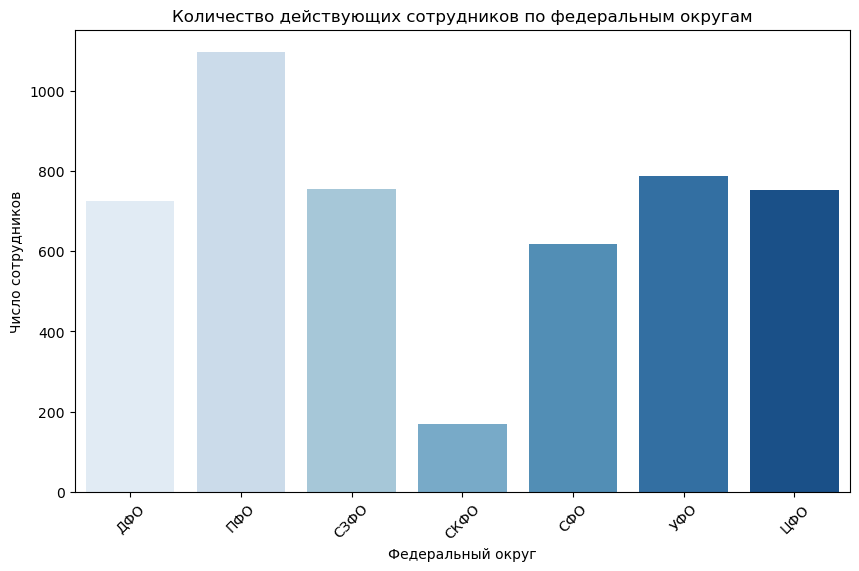

In [46]:
#отобразим на плоте
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_employed,
    x='Федеральный округ',
    y='Число сотрудников',
    palette='Blues'
)
plt.title('Количество действующих сотрудников по федеральным округам')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#свободные должности
vacant = for_task_2_enriched[(for_task_2_enriched['Табельный номер'].isna()) | \
(for_task_2_enriched['Табельный номер'] == "Резерв")]
#сгруппируем по регионам и сортируем
df_vacant = vacant.groupby('Регион').size().reset_index(name='Свободные должности')
df_vacant = df_vacant.sort_values('Свободные должности', ascending=False).head(10)


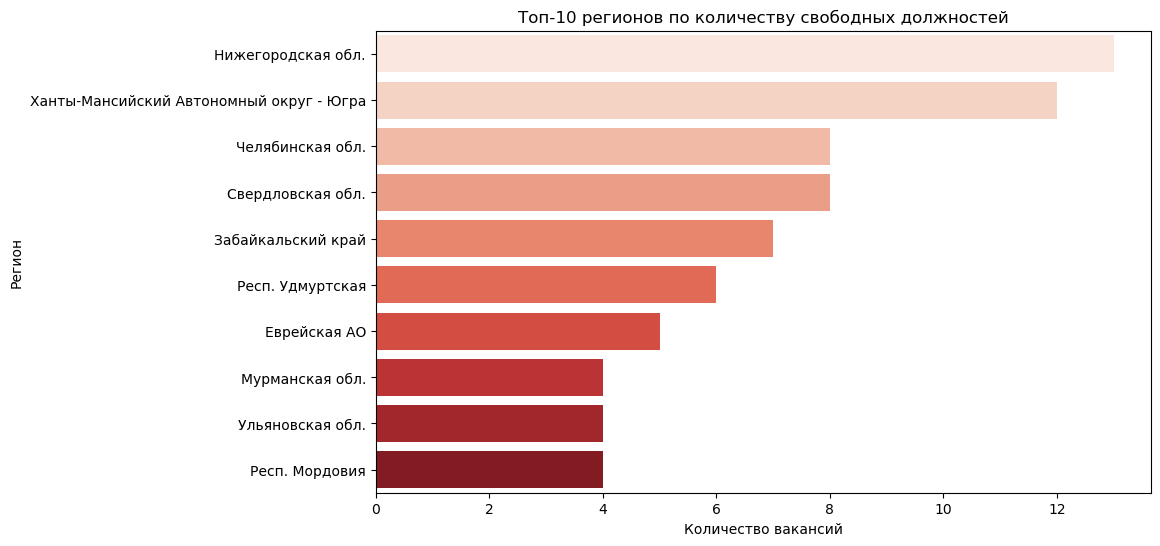

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_vacant,
    y='Регион',
    x='Свободные должности',
    palette='Reds'
)
plt.title('Топ-10 регионов по количеству свободных должностей')
plt.xlabel('Количество вакансий')
plt.show()